In [2]:
import pandas as pd
df = pd.read_csv('../../data/cleandata/clean_data.csv')

In [3]:
a = sorted(df.PULocationID.unique())
b = sorted(df.DOLocationID.unique())

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 

In [9]:
import fiona
import shapely
from shapely.geometry import shape
poly_list = []
shp_file = '../../data/taxi_zones/taxi_zones.shp'
taxi_zones = fiona.open(shp_file)
shape1 = shapely.geometry.shape(taxi_zones[0]['geometry'])
shape2 = shapely.geometry.shape(taxi_zones[1]['geometry'])
print(shape1.intersects(shape2))

False


In [13]:
import fiona
import shapely
from shapely.geometry import shape
poly_list = []
shp_file = '../../data/taxi_zones/taxi_zones.shp'
taxi_zones = fiona.open(shp_file)
adjacent = []
for i, zone in enumerate(taxi_zones):
    shape1 = shapely.geometry.shape(zone['geometry'])
    for j in range(i+1, len(taxi_zones)):
        zone2 = taxi_zones[j]
        shape2 = shapely.geometry.shape(zone2['geometry'])
        if shape1.intersects(shape2):
            adjacent.append([i+1,j+1])

In [24]:
df = pd.DataFrame(data=adjacent, columns=["zone1", "zone2"])
print(adjacent)
df.to_csv('../../data/cleandata/adjacent_zone.csv', index=False)

[[2, 30], [2, 132], [3, 32], [3, 51], [3, 81], [3, 184], [3, 185], [3, 242], [3, 254], [4, 79], [4, 148], [4, 224], [4, 232], [5, 84], [5, 99], [5, 204], [6, 115], [6, 118], [6, 214], [6, 221], [7, 146], [7, 179], [7, 193], [7, 207], [7, 223], [7, 226], [7, 260], [8, 179], [8, 223], [9, 16], [9, 73], [9, 98], [9, 121], [9, 171], [9, 192], [10, 205], [10, 215], [10, 216], [10, 218], [10, 219], [11, 14], [11, 22], [11, 67], [12, 13], [12, 88], [12, 261], [13, 231], [13, 261], [14, 67], [14, 227], [14, 228], [15, 16], [15, 171], [15, 252], [16, 64], [16, 98], [16, 171], [16, 175], [17, 37], [17, 49], [17, 61], [17, 80], [17, 217], [17, 225], [18, 20], [18, 94], [18, 136], [18, 174], [18, 241], [19, 64], [19, 101], [19, 175], [19, 191], [20, 31], [20, 47], [20, 78], [20, 94], [20, 174], [21, 22], [21, 26], [21, 108], [21, 123], [21, 178], [22, 26], [22, 67], [23, 99], [23, 118], [23, 156], [23, 187], [23, 251], [24, 41], [24, 43], [24, 151], [24, 166], [25, 33], [25, 40], [25, 52], [25, 65

In [65]:
from random import random
import networkx as nx
G = nx.MultiDiGraph()
for j in range(len(adjacent)):
    G.add_node(j)
for i in adjacent:
    G.add_edge(i[0], i[1], weight=1)


In [59]:
list(G.adjacency())

[(0, {}),
 (1, {}),
 (2, {30: {0: {}}, 132: {0: {}}}),
 (3,
  {32: {0: {}},
   51: {0: {}},
   81: {0: {}},
   184: {0: {}},
   185: {0: {}},
   242: {0: {}},
   254: {0: {}}}),
 (4, {79: {0: {}}, 148: {0: {}}, 224: {0: {}}, 232: {0: {}}}),
 (5, {84: {0: {}}, 99: {0: {}}, 204: {0: {}}}),
 (6, {115: {0: {}}, 118: {0: {}}, 214: {0: {}}, 221: {0: {}}}),
 (7,
  {146: {0: {}},
   179: {0: {}},
   193: {0: {}},
   207: {0: {}},
   223: {0: {}},
   226: {0: {}},
   260: {0: {}}}),
 (8, {179: {0: {}}, 223: {0: {}}}),
 (9,
  {16: {0: {}},
   73: {0: {}},
   98: {0: {}},
   121: {0: {}},
   171: {0: {}},
   192: {0: {}}}),
 (10, {205: {0: {}}, 215: {0: {}}, 216: {0: {}}, 218: {0: {}}, 219: {0: {}}}),
 (11, {14: {0: {}}, 22: {0: {}}, 67: {0: {}}}),
 (12, {13: {0: {}}, 88: {0: {}}, 261: {0: {}}}),
 (13, {231: {0: {}}, 261: {0: {}}}),
 (14, {67: {0: {}}, 227: {0: {}}, 228: {0: {}}}),
 (15, {16: {0: {}}, 171: {0: {}}, 252: {0: {}}}),
 (16, {64: {0: {}}, 98: {0: {}}, 171: {0: {}}, 175: {0: {}}}),
 (1

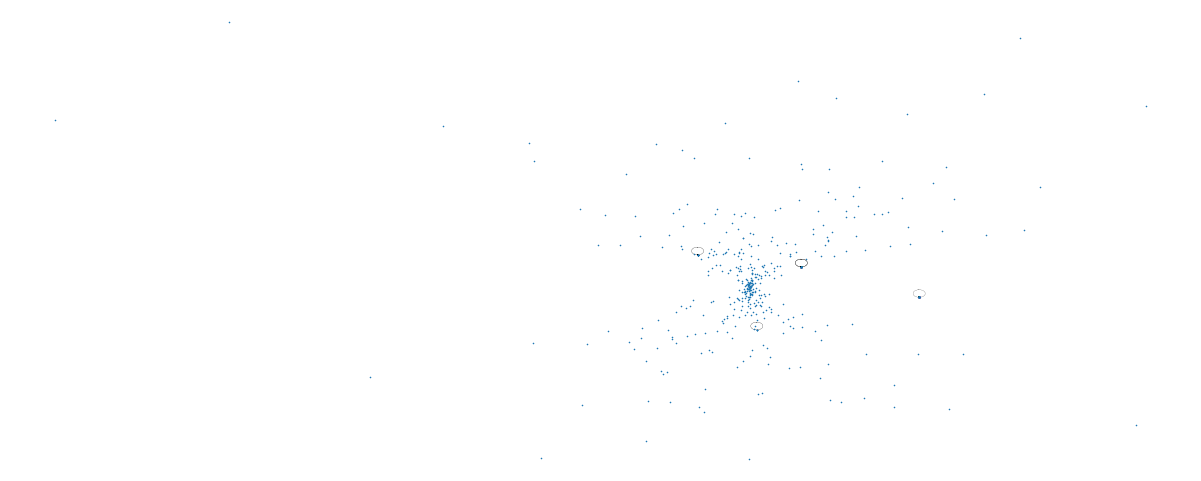

In [68]:
from matplotlib import pyplot as plt
fig = plt.figure(1, figsize=(200, 80), dpi=6)
nx.draw_spectral(G)

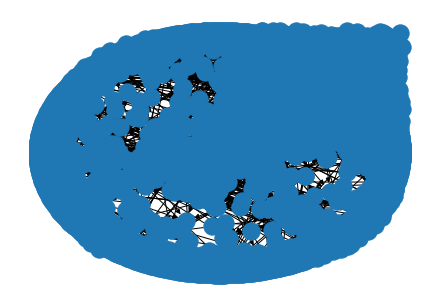

In [63]:
nx.draw(G)

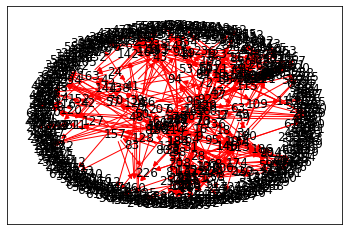

In [62]:
from matplotlib import pyplot as plt

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
plt.show()